## MNIST Single Layer CNN prediction

Import modules.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

Prepare the MNIST dataset.

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Import the trained model.

In [3]:
sess = tf.InteractiveSession()
saver = tf.train.import_meta_graph('single_cnn_export.meta')
saver.restore(sess, 'single_cnn_export')

x = tf.get_collection('input_image')[0]
p = tf.get_collection('prediction')[0]
h_conv = tf.get_collection('filters')[0]

Show predictions for some test data.

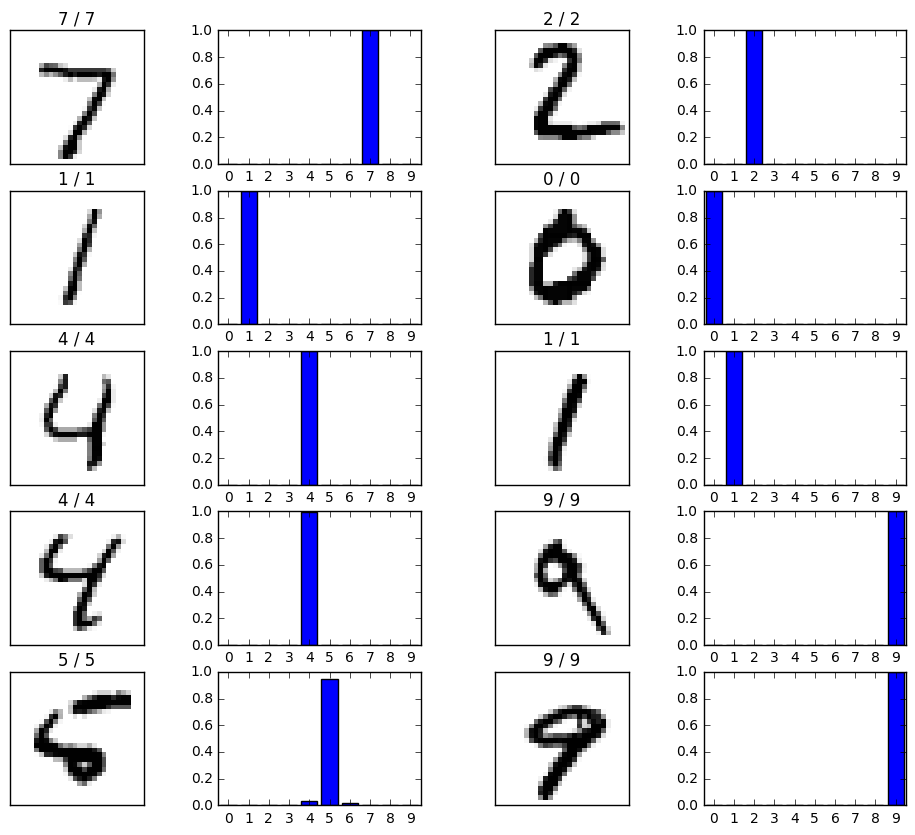

In [4]:
fig = plt.figure(figsize=(12,10))
c=0
for (image, label) in zip(mnist.test.images, 
                          mnist.test.labels):
    p_val = sess.run(p, feed_dict={x:[image]})
    pred = p_val[0]
    prediction, actual = np.argmax(pred), np.argmax(label)
    if prediction != actual:
        continue
    subplot = fig.add_subplot(5,4,c*2+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d / %d' % (prediction, actual))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation="nearest")
    subplot = fig.add_subplot(5,4,c*2+2)
    subplot.set_xticks(range(10))
    subplot.set_xlim(-0.5,9.5)
    subplot.set_ylim(0,1)
    subplot.bar(range(10), pred, align='center')
    c += 1
    if c == 10:
        break

Show samples of incorrect predictions.

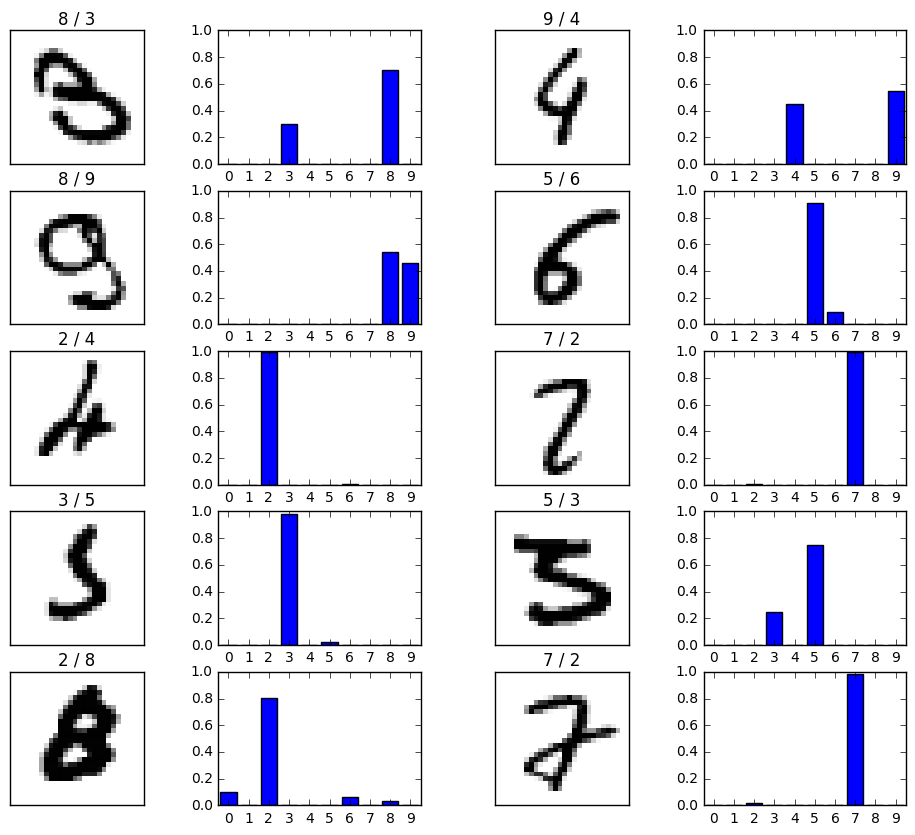

In [5]:
fig = plt.figure(figsize=(12,10))
c=0
for (image, label) in zip(mnist.test.images, 
                          mnist.test.labels):
    p_val = sess.run(p, feed_dict={x:[image]})
    pred = p_val[0]
    prediction, actual = np.argmax(pred), np.argmax(label)
    if prediction == actual:
        continue
    subplot = fig.add_subplot(5,4,c*2+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d / %d' % (prediction, actual))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation="nearest")
    subplot = fig.add_subplot(5,4,c*2+2)
    subplot.set_xticks(range(10))
    subplot.set_xlim(-0.5,9.5)
    subplot.set_ylim(0,1)
    subplot.bar(range(10), pred, align='center')
    c += 1
    if c == 10:
        break